In [2]:
import pickle
with open('model.pkl','rb') as f:
    rt=pickle.load(f)

In [3]:
import pandas as pd

In [4]:
data3=pd.read_csv('GUIDE_Test.csv')

C:\Users\srini\AppData\Local\Temp\ipykernel_17764\9212848.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data3=pd.read_csv('GUIDE_Test.csv')


In [5]:
b=data3.drop_duplicates()

In [6]:
b=b.drop(columns=['LastVerdict','SuspicionLevel','AntispamDirection','ResourceType','Roles','EmailClusterId','ActionGranular','ActionGrouped','MitreTechniques','ThreatFamily'])

In [7]:
b=b.dropna(subset='IncidentGrade')

In [10]:
y=b['IncidentGrade']

In [11]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
y=lr.fit_transform(y)

In [8]:
a=b[['OrgId',
 'IncidentId',
 'AlertId',
 'DetectorId',
 'AlertTitle',
 'Sha256',
 'IpAddress',
 'AccountObjectId',
 'DeviceName',
 'NetworkMessageId',
 'FileName',
 'FolderPath',
 'CountryCode',
 'State',
 'City',
 'EntityType',
 'Category']]

In [12]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for i in ['EntityType','Category']:
    a[i]=lr.fit_transform(a[i])

C:\Users\srini\AppData\Local\Temp\ipykernel_17764\2020145073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]=lr.fit_transform(a[i])
C:\Users\srini\AppData\Local\Temp\ipykernel_17764\2020145073.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i]=lr.fit_transform(a[i])


In [14]:
ypred=rt.predict(a)

In [15]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(ypred,y)

In [16]:
accuracy

0.923844857913232

In [20]:
from sklearn.metrics import confusion_matrix
con=confusion_matrix(ypred,y,labels=rt.classes_)

In [21]:
con

array([[1647189,   75477,   68450],
       [  61123,  789430,   28493],
       [  44583,   37757, 1395386]])

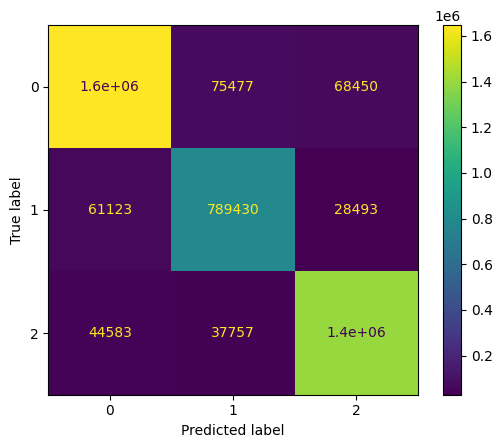

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=con,display_labels=rt.classes_)
disp.plot()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>